In [ ]:
!pip install prophet yfinance

In [ ]:
#importing libraries for our time series analysis
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

import yfinance as yf



In [ ]:

symbol = 'AMZN'
start = '2023-01-01'
end = '2024-01-31'
data = yf.download(symbol, start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [ ]:
#viewing the data
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800
2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400
2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100


In [ ]:
data = data[['Adj Close']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2023-01-03 to 2024-01-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  270 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


In [ ]:
data.describe()

,Adj Close
count,270.000000
mean,123.755260
std,20.082660
min,83.120003
25%,102.612499
50%,128.180000
75%,139.327507
max,161.259995


<p> From time series class, one thing I will never forget is to create a plot of my data. Visualizing the time series allows You to gain a deeper understanding of its patterns, trends, and any irregularities that may exist. It's a fundamental step in the analysis process, helps inidentifying insights and making informed decisions based on the data's behavior.</p>

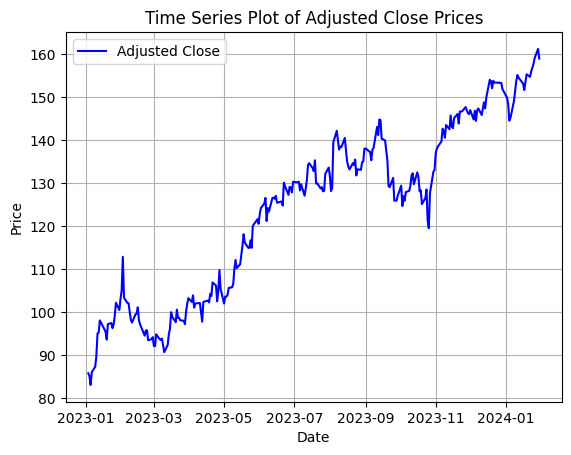

In [ ]:
plt.plot(data.index, data['Adj Close'], label='Adjusted Close', color='blue')
plt.title('Time Series Plot of Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

1. From this plot we can see the overall stock have been in an Uptrend
2. But to get a really closer look  I will plot let me me break it down well


In [ ]:
data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)


<ipython-input-9-0d8bc39a6db7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data.index)


In [ ]:
data.head()

,Adj Close
Date,
2023-01-03,85.820000
2023-01-04,85.139999
2023-01-05,83.120003
2023-01-06,86.080002
2023-01-09,87.360001


In [ ]:
#Resampling data to monthly frequency
monthly_data = data.resample('M').mean()

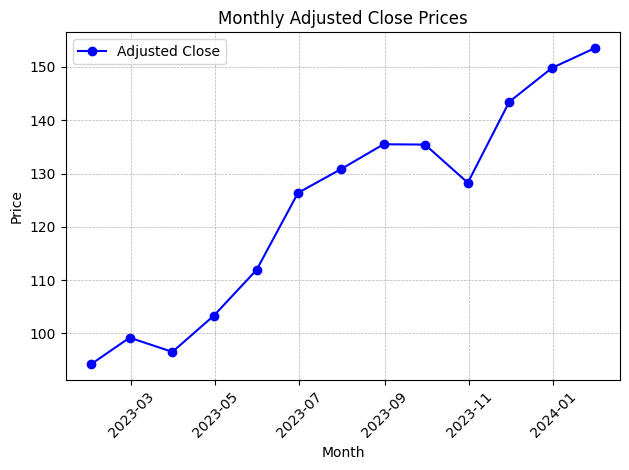

In [ ]:
plt.plot(monthly_data.index, monthly_data['Adj Close'], label='Adjusted Close', color='blue', marker='o', linestyle='-')
plt.title('Monthly Adjusted Close Prices')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
monthly_data.tail()

,Adj Close
Date,
2023-09-30,135.440001
2023-10-31,128.278636
2023-11-30,143.457621
2023-12-31,149.824000
2024-01-31,153.535999


#### Traditional

#### Analysis of stationarity

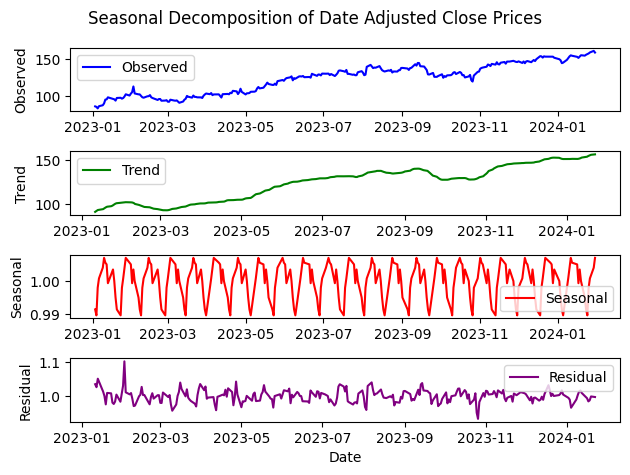

In [ ]:
# Perform seasonal decomposition
result = seasonal_decompose(data['Adj Close'], model='multiplicative', period=12)

plt.subplot(4, 1, 1)
plt.plot(data.index, result.observed, label='Observed', color='blue')
plt.legend()
plt.ylabel('Observed')

plt.subplot(4, 1, 2)
plt.plot(data.index, result.trend, label='Trend', color='green')
plt.legend()
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(data.index, result.seasonal, label='Seasonal', color='red')
plt.legend()
plt.ylabel('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(data.index, result.resid, label='Residual', color='purple')
plt.legend()
plt.ylabel('Residual')

plt.xlabel('Date')
plt.suptitle('Seasonal Decomposition of Date Adjusted Close Prices')

plt.tight_layout()
plt.show()



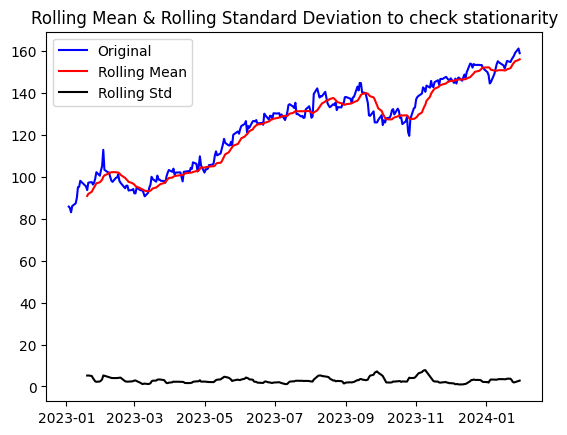

In [ ]:
mean = data['Adj Close'].rolling(window=12).mean()
std = data['Adj Close'].rolling(window=12).std()
plt.plot(data['Adj Close'], color='blue', label='Original')
plt.plot(mean, color='red', label='Rolling Mean')
plt.plot(std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling Standard Deviation to check stationarity')
plt.show()





**Analysis of Time Series Stationarity**

This confirms, as mentioned above, that the time series data is not stationary. Stationarity is a fundamental concept in time-series analysis, indicating that the statistical properties of a dataset, such as mean and variance, remain constant over time. However, in this case, they do not, and the reason for non-stationarity in our time series data is evident. Stationarity is crucial because it signifies the constancy of behavior in time series data. A stationary time series will not exhibit trends or seasonal patterns.

Moreover, this concept serves as an underlying assumption in many time series techniques, such as ARMA, ARIMA, SARIMA, etc., just as we have normality and independence assumptions in regression models.

<b>But this is just a visual analysis , to confirm this very well we have tests to check if time series data is stationary or not and I will be using ADF</i>
<a href src ="https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/"> resource </b>




In [ ]:
# test for statioanrity
adfuller(data['Adj Close'])


(-1.141956443942577,
 0.6980535876678723,
 2,
 267,
 {'1%': -3.4550813975770827,
  '5%': -2.8724265892710914,
  '10%': -2.5725712007462582},
 1168.2165980626132)

In [ ]:
#test for stationarity

def test_stationarity(data):

    #Perform Dickey-Fuller test:
    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <  0.05:
        print("Reject the null hypothesis. The data is stationary.")
    else:
        print("Fail to reject the null hypothesis. The data is non-stationary.")

In [ ]:
test_stationarity(data['Adj Close'])

ADF Statistic: -1.141956
p-value: 0.698054
Critical Values:
	1%: -3.4550813975770827
	5%: -2.8724265892710914
	10%: -2.5725712007462582
Fail to reject the null hypothesis. The data is non-stationary.


<h5>Stationarity test confirmed

---
Since the data is not stationary, further steps may be required to transform or model the data appropriately for analysis.

Common approaches to handle non-stationarity include:

    Differencing the data to remove trends or seasonal patterns.
    Applying transformations such as logarithmic or Box-Cox transformations.
    Using advanced modeling techniques designed for non-stationary data, such as ARIMA or SARIMA models.

---

In [ ]:
ts = data['Adj Close']

test_stationarity(ts)


# First-order differencing
ts_diff_1 = ts.diff().dropna()
print("\nFirst-order Differencing ADF Test:")
test_stationarity(ts_diff_1)



ADF Statistic: -1.141956
p-value: 0.698054
Critical Values:
	1%: -3.4550813975770827
	5%: -2.8724265892710914
	10%: -2.5725712007462582
Fail to reject the null hypothesis. The data is non-stationary.

First-order Differencing ADF Test:
ADF Statistic: -13.248418
p-value: 0.000000
Critical Values:
	1%: -3.4550813975770827
	5%: -2.8724265892710914
	10%: -2.5725712007462582
Reject the null hypothesis. The data is stationary.


<p>So normally when we are testing for statioanrity we use a technique called differencing.</p>

If the first differencing doesnt work we diff again but in our case it worked </p>

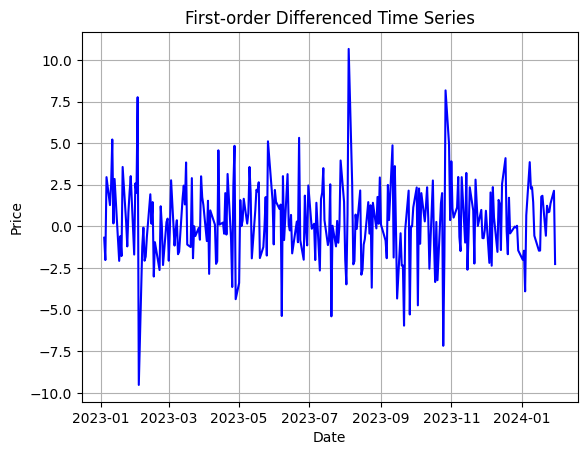

In [ ]:
# plot of the statioanry data
plt.plot(ts_diff_1, color='blue')
plt.title('First-order Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


We can see there is no clear trends and if we decide to check the mean and variance of it this will be constant therefore our data doesnt depend on the time now


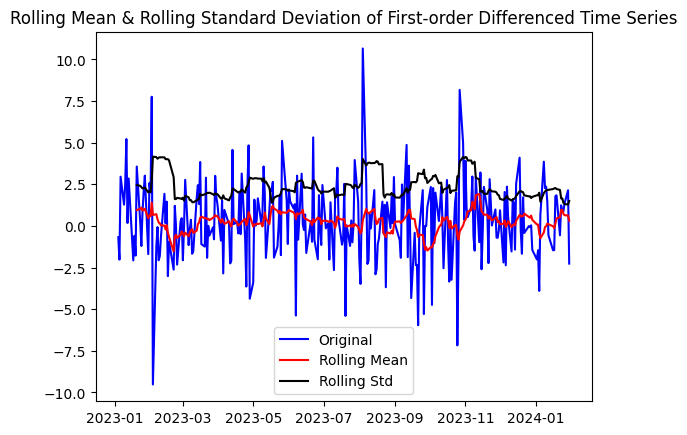

In [ ]:
mean_ts_diff_1 = ts_diff_1.rolling(window=12).mean()
std_ts_diff_1 = ts_diff_1.rolling(window=12).std()
plt.plot(ts_diff_1, color='blue', label='Original')
plt.plot(mean_ts_diff_1, color='red', label='Rolling Mean')
plt.plot(std_ts_diff_1, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling Standard Deviation of First-order Differenced Time Series')
plt.show()

In [ ]:
#checking for autocorrelations
sm.stats.durbin_watson(ts_diff_1)

2.1005680135135045

1. 0 to 1.5: Strong positive autocorrelation.
2. 1.5 to 2.5: Little to no autocorrelation (ideal).
3. 2.5 to 4: Strong negative autocorrelation.

Building models to forecast the data.

I will use the auto.arima to avoid complexity here

In [ ]:
ts_diff_1.head()

,Adj Close
Date,
2023-01-04,-0.680000
2023-01-05,-2.019997
2023-01-06,2.959999
2023-01-09,1.279999
2023-01-10,2.510002


### Forecast with FBprophet

In [ ]:
from prophet import Prophet

In [ ]:
df = data.reset_index()  # This will move the index (Date) into a column


In [ ]:
df.head()

,Date,Adj Close
0,2023-01-03,85.820000
1,2023-01-04,85.139999
2,2023-01-05,83.120003
3,2023-01-06,86.080002
4,2023-01-09,87.360001


In [ ]:
df = df.rename(columns={'Date': 'ds',
                        'Adj Close': 'y'})

df.head()

,ds,y
0,2023-01-03,85.820000
1,2023-01-04,85.139999
2,2023-01-05,83.120003
3,2023-01-06,86.080002
4,2023-01-09,87.360001


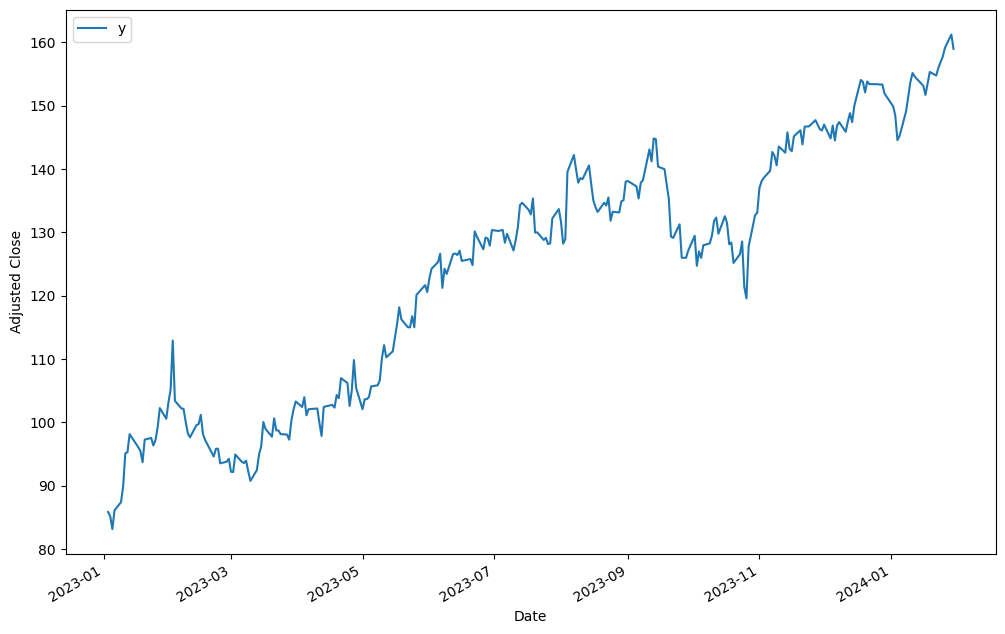

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Adjusted Close')
ax.set_xlabel('Date')

plt.show()

In [ ]:
df.isnull().sum()

,0
ds,0
y,0


In [ ]:
model = Prophet(interval_width=0.95)


In [ ]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph7tpp1uk/scb9dd4t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph7tpp1uk/4_vypsjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27492', 'data', 'file=/tmp/tmph7tpp1uk/scb9dd4t.json', 'init=/tmp/tmph7tpp1uk/4_vypsjf.json', 'output', 'file=/tmp/tmph7tpp1uk/prophet_modeluec9yqox/prophet_model-20240929155243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:52:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:52:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = model.make_future_dataframe(periods=30)
future_dates.tail()


,ds
295,2024-02-25
296,2024-02-26
297,2024-02-27
298,2024-02-28
299,2024-02-29


In [ ]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
288,2024-02-18,159.777847,151.709294,168.251082
289,2024-02-19,164.374461,155.704377,172.432002
290,2024-02-20,164.463591,155.493395,173.030223
291,2024-02-21,164.535394,156.053843,172.264894
292,2024-02-22,164.899598,156.763714,173.576541
293,2024-02-23,165.646021,157.639604,174.412412
294,2024-02-24,161.298184,153.578619,169.353807
295,2024-02-25,161.551576,152.583860,169.916870
296,2024-02-26,166.148191,157.503183,174.835605
297,2024-02-27,166.237320,158.074669,174.369907


In [ ]:
symbol = 'AMZN'
start = '2024-02-01'
end = '2024-02-28'
test = yf.download(symbol, start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [ ]:
test['Adj Close'].tail(8)

Date
2024-02-15    169.800003
2024-02-16    169.509995
2024-02-20    167.080002
2024-02-21    168.589996
2024-02-22    174.580002
2024-02-23    174.990005
2024-02-26    174.729996
2024-02-27    173.539993
Name: Adj Close, dtype: float64

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


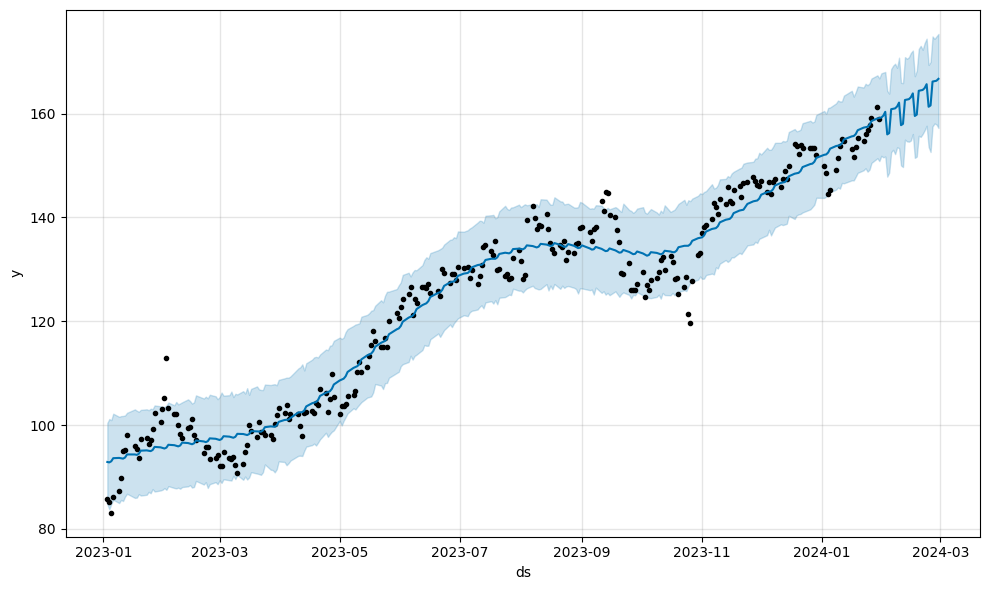

In [ ]:
figure = model.plot(forecast);

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)



In [ ]:
plot_components_plotly(model, forecast)